In [10]:
import pandas as pd
music_df = pd.read_csv('music.csv') #call music.csv
music_df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [7]:
#Data needed to be cleaned before can be used. Why? Refer to In 5

#Do not need to clean data such as duplicates or null values
#split dataset into two dataset -> input, output
#why?
#input is used by the AI to make an output. In this case, age and gender is input, genre is output
#used so AI can predict what genre liked if age=x and gender=y

In [13]:
X = music_df.drop(columns=['genre']) 
#Assigning X with music_df dataframe without genre value. X is used as input
Y = music_df['genre']
#Assigning Y with music_df dataframe genre value. Y is used for output

In [14]:
from sklearn.tree import DecisionTreeClassifier #we will use DecisionTreeClassifier sklearn.tree for model

model = DecisionTreeClassifier() #make model
model.fit(X,Y) #model fit is used to train model to look for pattern
predictions = model.predict([ [21, 1],[22,0] ]) #ask model to predict output. Data is given by self. 2D Array input
predictions

#This shows that prediction is correct, since expected 20-25 male likes HipHop, and 20-25 female likes dance

#However this could not be used in normal scenario due to huge amount of data
#Cannot check by ourself
#Machine needs to check by itself to know it's accuract
#done by splitting dataset into 2. For training and testing. Training is when AI knows the output. 
#Testing when AI doesn't know output.

array(['HipHop', 'Dance'], dtype=object)

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

music_df = pd.read_csv('music.csv') #call music.csv
X = music_df.drop(columns=['genre']) 
Y = music_df['genre']
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.4) #Training to testing ratio is set to 0.8:0.2

model = DecisionTreeClassifier() #make model
model.fit(X_train,Y_train) #train model by only using 80% data 
predictions = model.predict(X_test) #ask model to predict output. Data is given by self. 2D Array input

score = accuracy_score(Y_test, predictions) #used to compare the predictions with real result (Y_test)
score

#score value will not always be the same. This is due to the model takes data for training randomly
#If test_size is decreased, accuracy will worsen
#Data needs to be cleaned, like removing duplicates, so that model will not be thrown off by duplicates

0.75

In [35]:
#Persisting Models
#Training model is time consuming, thousands to millions of samples
#Persisting Models -> Model that have been trained so that another user could use it without training it again

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib #has method for saving and loading models. Used to make Persisting Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

music_df = pd.read_csv('music.csv')
X = music_df.drop(columns=['genre']) 
Y = music_df['genre']
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.8)
model = DecisionTreeClassifier() #make model
model.fit(X_train,Y_train) #train model by only using 80% data 

joblib.dump(model, 'music-reccomender.joblib') #make Persisting model that have been trained by model.fit


['music-reccomender.joblib']

In [36]:
model = joblib.load('music-reccomender.joblib') #use persisting models
predictions = model.predict([[21,1]]) #test if model accurate 
predictions

array(['HipHop'], dtype=object)

In [37]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #method for exporting Desicion tree in grapical format

music_df = pd.read_csv('music.csv')
X = music_df.drop(columns=['genre']) 
Y = music_df['genre']

model = DecisionTreeClassifier() #make model
model.fit(X,Y)

tree.export_graphviz(model,
                     out_file='music-recommender.dot',
                     feature_names=['age','gender'],
                     class_names=sorted(Y.unique()),
                     label='all',
                     rounded='true',
                     filled='true')
                     
#out_file ->output file (.dot is graph description language)
#feature_names -> features/collumns of our dataset
# class_names->list of class/labels we have in the output dataset e.g. HipHop
#round and filled affects the node in the .dot file. Since both true, each node has color and round edge

#open dot file with vsc, extension graphvis 



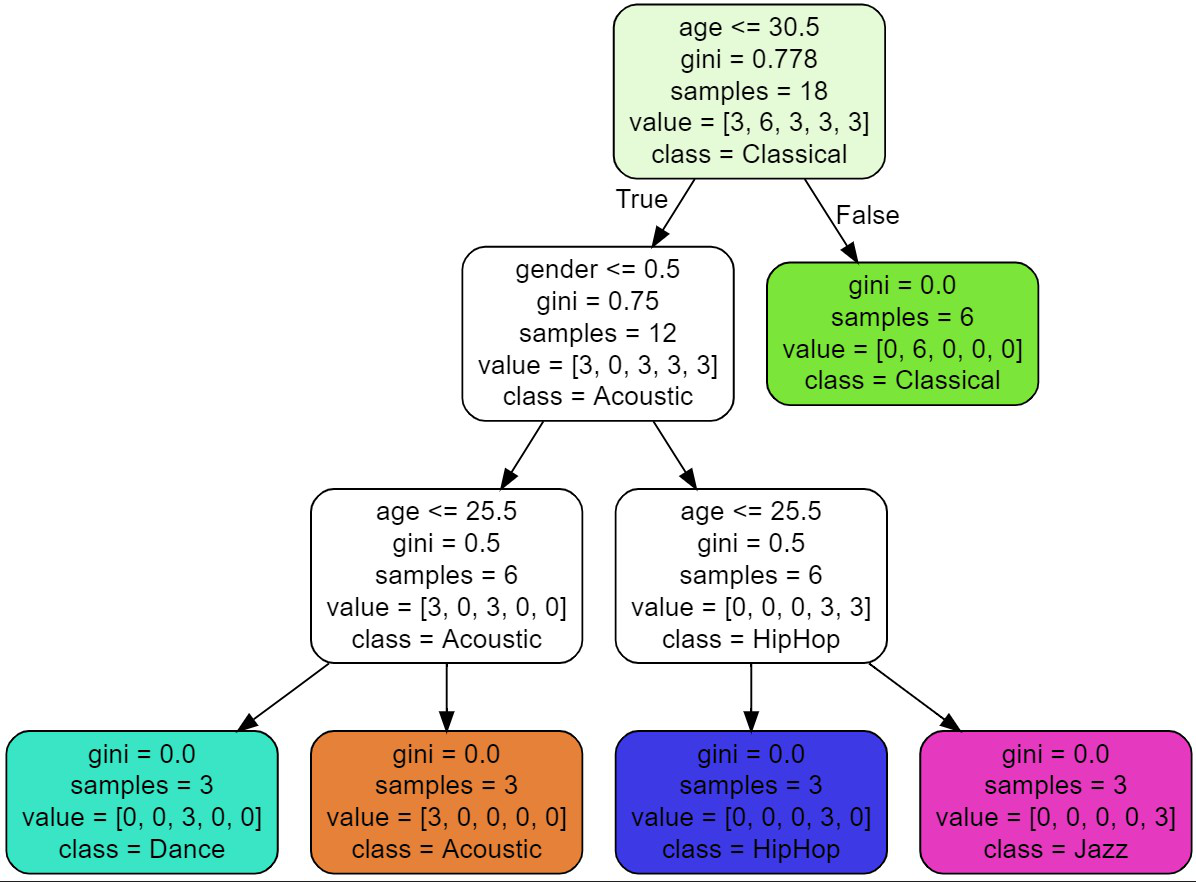

In [44]:
from PIL import Image
dot_file = Image.open('Graph from .dot file.jpg')
dot_file

In [ ]:
#Graph above shows how our model makes predictions
#each node have max 2 child (if else)
#top line at node (e.g. top node consition is age<=30.5) false -> older than 30, Classical
#second row, If gender is lower than 0.5 (female), class= Acoustic, if higher hiphop.
#and so on